# Mini-Project 2

Welcome to your second Mini-Project! You will use numpy to build neural networks to predict the house price in Boston. Look for "TODO" inside the code block and complete the required tasks.

---
**Note**: In this project you can **ONLY** use numpy and matplotlib packages.

## Problem Description
 This data was collected in 1978 and each of the 506 entries represents aggregate information about homes from various suburbs located in Boston. Once you get a good fit, you can use this model to predict the monetary value of a house located at the Boston’s area. A model like this would be very valuable for a real state agent who could make use of the information provided in a dayly basis.

The dataset will be like:

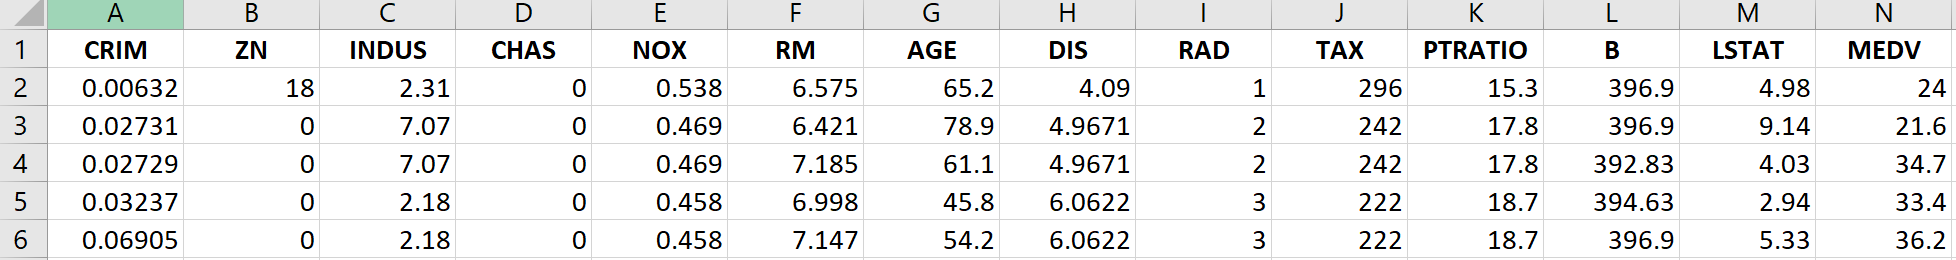

**Features**:
- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centres
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per 10,000usd
- PTRATIO: pupil-teacher ratio by town
- B: $1000(B_k - 0.63)^2$ where $B_k$ is the proportion of blacks by town
- LSTAT: percentage lower status of the population

**Label**:
- MEDV: This is the median value of owner-occupied homes in $1000s

## Task 1: Read and Preprocess Data

In this section, you will implement the `DataPreprocessing` utility class to provide the training data and the test data for the downstream regressor based on Neural Networks.

In [14]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Task 1.1: Implement utility class

**Requirements:**

- Use `np.fromfile('filename.data', sep=" ")` to read data.
- Usually, the raw dataset will be **randomly** divided into training set and test set according to the given size of the training set.
- **Min-max scaler** transforms features X by scaling each feature to a given range $[a, b]$. The transformation is given by:
$$X_{\text{std}}=\frac{X - X_{\text{min}}}{X_{\text{max}}-X_{\text{min}}}$$
$$X_{\text{scaled}}=X_{\text{std}}\cdot(b-a) + a$$


In [16]:
class DataPreProcessing:
    def __init__(self):
        pass
    
    @staticmethod
    def read_data(file, separator):
        """
        Use the Numpy function fromfile() to load the dataset from the given file.
        
        Parameters
        ----------
        file: string
            String path of the data file.
        separator: string
            Separator between items if file is a text file.

        Return
        ----------
        data: ndarray
            Data read from the given file.
        """
        # TODO: write your code here
        dataset = np.fromfile(file, sep= separator)
        return dataset

    @staticmethod
    def train_test_split(data, train_size, shuffle=True):
        """
        Split the given data into random train and test subsets. 
        
        Parameters
        ----------
        data: ndarray
            Input of the given data.
        train_size: float
            The proportion of the dataset to include in the train split.
        shuffle: bool
            Whether or not to shuffle the data before splitting.

        Return
        ----------
        train_data: ndarray
            Output of the training data.
        test_data: ndarray
            Output of the test data.
        """
        # TODO: write your code here
        if shuffle:
            np.random.shuffle(data)
        train_len = int(train_size*len(data))
        train_data = data[:train_len,:]
        test_data = data[train_len:,:]
        return train_data, test_data

    @staticmethod
    def minmax_scale(X, feature_range=(0, 1)):
        """
        Transform features X by scaling each feature to a given range. 
        
        Parameters
        ----------
        data: ndarray
            Input of the given data.
        feature_range: tuple
            Desired range of transformed data.

        Return
        ----------
        X_scaled: ndarray
            Output of the scaled features.
        """
        # TODO: write your code here
        # Compute the minimum and maximum value for each feature
        val_min = np.min(X, axis=0)
        val_max = np.max(X, axis=0)

        # Compute the range for each feature
        feature_ranges = val_max - val_min

        # Compute the scaled features
        X_scaled = (X - val_min)/feature_ranges*(feature_range[1]-feature_range[0]) + feature_range[0]

        return X_scaled

### Task 1.2 Apply utility class

Apply your implemented utility class to complete the data reading and preprocessing.

**Requirements**:
- `X_train` should be an $n\times m$ matrix where $n$ is the number of features and $m$ is the number of training examples. In this project, $n=13$ and $m=\lfloor0.8\times506\rfloor$.
- The shape of `y_train` should be $1\times m$ where $m$ is the number of training examples.
- `X_test` and `y_test` should have the similar shape.

In [17]:
# Init the train size
train_size = 0.8

# TODO: init an object of DataPreProcessing
preprocessor = DataPreProcessing()

# TODO: read the data from the data file
dataset = preprocessor.read_data('housing.data', separator=" ")
dataset = dataset.reshape(-1, 14)

# TODO: split the data random train and test subsets
train_dataset, test_dataset = preprocessor.train_test_split(dataset, train_size)

# TODO: split the training subset into X_train and y_train
X_train = train_dataset[:,:-1]
y_train = train_dataset[:,-1]

# TODO: split the test subset into X_test and y_test
X_test = test_dataset[:,:-1]
y_test = test_dataset[:,-1]

# TODO: 0-1 scale X_train and X_test respectively
X_train = preprocessor.minmax_scale(X_train)
X_test = preprocessor.minmax_scale(X_test)

# TODO: reshape X_train, X_test, y_train, and y_test to satisfy the requirments
X_train = np.transpose(X_train)
X_test = np.transpose(X_test)
y_train = np.expand_dims(y_train, axis=0)
y_test = np.expand_dims(y_test, axis=0)

In [18]:
# Test code
assert X_train.shape == (13, 404), "X_train should be a 13 by 404 matrix."
assert y_train.shape == (1, 404), "y_train should be a 1 by 404 matrix."
assert X_test.shape == (13, 102), "X_test should be a 13 by 102 matrix."
assert y_test.shape == (1, 102), "y_test should be a 1 by 102 matrix."

print('Great')

Great


## Task 2: Shallow Neural Network
In this task, you will create a shallow neural network with **only one hidden layer** to predict the Boston house price.

### Task 2.1: Initialize model parameters
Since the model is a two-layer (one hidden layer and an output layer) neural network, model parameters will be $W_1$, $b_1$, $W_2$, and $b_2$. In this task, you should implement a function of `init_params` to initialize parameters based on [He method](https://towardsdatascience.com/weight-initialization-techniques-in-neural-networks-26c649eb3b78).

**Hints:**
- $W_1$ should be an $l_1\times l_0$ matrix where $l_1$ is the hidden layer size and $l_0$ is the feaure dimension of input samples.
- $b_1$ should be an $l_1\times1$ matrix.
- $W_2$ and $b_2$ should have the silimar dimensionality.
- Use `np.random.randn()` to generate random values.

In [29]:
def init_params(input_layer_size, hidden_layer_size, output_layer_size):
    """
    Initialize model parameters based on He initialization method.
        
    Parameters
    ----------
    input_layer_size: int
        Number of features in the input sample.
    hidden_layer_size: int
        Number of neurons in the hidden layer.
    output_layer_size: int
        Number of neurons in the output layer.

    Return
    ----------
    W1: ndarray
        Output of initialized W1.
    b1: ndarray
        Output of initialized b1.
    W2: ndarray
        Output of initialized W2.
    b2: ndarray
        Output of initialized b2.
    """
    # TODO: write your code here
    W1 = np.random.randn(hidden_layer_size, input_layer_size) * np.sqrt(2 / input_layer_size)
    b1 = np.zeros(shape=(hidden_layer_size, 1))

    W2 = np.random.randn(output_layer_size, hidden_layer_size) * np.sqrt(2 / hidden_layer_size)
    b2 = np.zeros(shape=(output_layer_size, 1))

    return W1, b1, W2, b2

### Task 2.2: Implement ReLU activation function
ReLU is the most common activation function used in neural networks. Implement the ReLU function and use it in your model.
$$a = \begin{cases}
   z &\text{if } z>0 \\
   0 &\text{if } z\le0
\end{cases}$$

$$\frac{da}{dz} = \begin{cases}
   1 &\text{if } z>0 \\
   0 &\text{if } z\le0
\end{cases}$$

In [34]:
def relu(Z, derivative=False):
    """
    If derivative=False, return the result transformed by the ReLU function.
    If derivative=True, return the result transformed by the derivative of the ReLU function.

    Parameters
    ----------
    Z: ndarray
        Input of the given data.
    derivative: bool.
        Whether or not to take the derivative of the ReLU function.

    Return
    ----------
    A: ndarray
        Output of the transformed matrix.
    """
    # TODO: write your code here
    if not derivative:
        A = np.where(Z > 0, Z, np.zeros_like(Z))
    else:
        A = np.where(Z > 0, np.ones_like(Z), np.zeros_like(Z))
    return A

### Task 2.3: Implement forward propagation function
The forward function is used to define how your model is going to be run, from input to output.

**Hints:**
- Computations in the forward propagation:
$$Z^{[1]}=W^{[1]}X+b^{[1]}$$
$$A^{[1]}=g(Z^{[1]})$$
$$Z^{[2]}=W^{[2]}A^{[1]}+b^{[2]}$$
$$\hat{y}=g(Z^{[2]})$$
where $g()$ is the ReLU activation function.

In [21]:
def forward(X, W1, b1, W2, b2):
    """
    Generates output predictions for the input samples with given params.
        
    Parameters
    ----------
    X: ndarray
        Input samples with shape of n x m where n is the feature dimension 
        and m is the number of samples.
    W1: ndarray
        Weights of the hidden layer.
    b1: ndarray
        Intercepts of the hidden layer.
    W2: ndarray
        Weights of the output layer.
    b2: ndarray
        Intercepts of the output layer.

    Return
    ----------
    Z1: ndarray
        Output of the hidden layer before applying activation function.
    A1: ndarray
        Output of the hidden layer
    Z2: ndarray
        Output of the output layer before applying activation function.
    A2: ndarray
        Output of the output layer.
    """
    # TODO: write your code here
    Z1 = np.dot(W1,X) + b1
    A1 = relu(Z1, derivative=False)
    Z2 = np.dot(W2,A1) + b2
    A2 = relu(Z2, derivative=False)

    return Z1, A1, Z2, A2

### Task 2.4: Implement loss function
For this regression problem, we will use mean squared error (MSE) as the loss function.
$$J=\frac{1}{2m}\sum_{i=1}^m\left(\hat{y}^{(i)} - y^{(i)}\right)^2$$

In [53]:
def loss(y_truth, y_pred):
    """
    Return the mean squared error between the ground truth and predictions.
        
    Parameters
    ----------
    y_truth: ndarray
        An 1 x m matrix of ground truth.
    y_pred: ndarray
        An 1 x m matrix of predictions.

    Return
    ----------
    loss: float
        Output of the mean squared error.
    """
    # TODO: write your code here
    loss = 1 * np.sum((y_pred - y_truth)**2) / (2 * y_truth.shape[1])
    loss = np.squeeze(loss)
    return loss

### Task 2.5: Implement backpropagation function
The backward calculates the gradient of the loss function with respect to the neural network's weights and intercepts.


In [23]:
def backward(X, y, Z1, A1, Z2, A2, W1, b1, W2, b2):
    """
    Return the gradient of the loss function with respect to the model's weights.
        
    Parameters
    ----------
    X: ndarray
        Input samples with shape of n x m where n is the feature dimension 
        and m is the number of samples.
    y: ndarray
        An 1 x m matrix of ground truth.
    Z1: ndarray
        Output of the hidden layer before applying activation function.
    A1: ndarray
        Output of the hidden layer.
    Z2: ndarray
        Output of the output layer before applying activation function.
    A2: ndarry
        Output of the output layer.
    W1: ndarray
        Weights of the hidden layer.
    b1: ndarray
        Intercepts of the hidden layer.
    W2: ndarray
        Weights of the output layer.
    b2: ndarray
        Intercepts of the output layer.

    Return
    ----------
    dW1: ndarray
        Gradients of weiths at the hidden layer.
    db1: ndarray
        Gradients of intercepts at the hidden layer.
    dW2: ndarray
        Gradients of weiths at the output layer.
    db2: ndarray
        Gradients of intercepts at the output layer.
    """
    # TODO: write your code here
    m = X.shape[1]
    # Compute the dW2 and db2
    dA2 = A2 - y
    dZ2 = dA2 * relu(Z2, derivative=True)
    dW2 = dZ2 @ A1.T / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m

    # Compute the dW1 and db1
    dA1 = W2.T @ dZ2
    dZ1 = dA1 * relu(Z1, derivative=True)
    dW1 = dZ1 @ X.T / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    return dW1, db1, dW2, db2

### Task 2.6: Implement update function
In this part, we will update model parameters according to the generated gradients.
$$W:=W-\alpha\cdot dW$$
$$b:=b-\alpha\cdot db$$

In [24]:
def update(lr, W1, b1, W2, b2, dW1, db1, dW2, db2):
    """
    Return updated parameters based on the gradient descent optimization. 
        
    Parameters
    ----------
    lr: float
        Learning rate.
    W1: ndarray
        Weights of the hidden layer.
    b1: ndarray
        Intercepts of the hidden layer.
    W2: ndarray
        Weights of the output layer.
    b2: ndarray
        Intercepts of the output layer.
    dW1: ndarray
        Gradients of weiths at the hidden layer.
    db1: ndarray
        Gradients of intercepts at the hidden layer.
    dW2: ndarray
        Gradients of weiths at the output layer.
    db2: ndarray
        Gradients of intercepts at the output layer.

    Return
    ----------
    W1_: ndarray
        Updated weights of the hidden layer.
    b1_: ndarray
        Updated intercepts of the hidden layer.
    W2_: ndarray
        Updated weights of the output layer.
    b2_: ndarray
        Updated intercepts of the output layer.
    """
    # TODO: write your code here
    W1 = W1 - lr * dW1
    W2 = W2 - lr * dW2
    b1 = b1 - lr * db1
    b2 = b2 - lr * db2

    return W1, W2, b1, b2

### Task 2.7: Implement train function
So far, you have implemented functions that are required to train the neural network model. It's time to organize them and complete the training step. Let's keep moving on!

**Note:** Since you have learned how to create mini-batches in Mini-Project 1, just directly use the given `create_batches()`.

In [25]:
def create_batches(X, y, batch_size):
    """
    Split the data X and y with given batch size.

    Parameters
    ----------
    X: ndarray
        Features with shape n by m.
    y: ndarray
        Labels with shape k by m.
    batch_size: int
        Batch size.

    Return
    ----------
    batches_X: list
        Created small batches of X.
    batches_y: list
        Created small batches of y.
    """
    # Get the number of examples
    m = X.shape[1]
    # Get label dimension
    k = y.shape[0]

    # Init variables to save batches
    batches_X = []
    batches_y = []
    
    # Combine X and y
    data = np.vstack((X, y))
    np.random.shuffle(data.T)
        
    # Calculate the number of mini batches
    n_minibatches = m // batch_size 

    for i in range(n_minibatches): 
        mini_batch = data[:, i * batch_size:(i + 1) * batch_size]        
        batches_X.append(mini_batch[:-k, :])
        batches_y.append(mini_batch[-k:, :])
        
    # Handle the rest data
    if m % batch_size != 0: 
        mini_batch = data[:, n_minibatches * batch_size:]        
        batches_X.append(mini_batch[:-k, :])
        batches_y.append(mini_batch[-k:, :])
        
    return batches_X, batches_y

In [63]:
def train(X_train, y_train, X_test, y_test, W1, b1, W2, b2, lr, batch_size, epochs):
    """
    Train the model based on the mini-batch gradient descent.

    Parameters
    ----------
    X_train: ndarray
        Features of the training data with shape n by m1.
    y_train: ndarray
        Labels of the training data with shape 1 by m1.
    X_test: ndarray
        Features of the training data with shape n by m2.
    y_test: ndarray
        Labels of the training data with shape 1 by m2.
    W1: ndarray
        Initial weights of the hidden layer.
    b1: ndarray
        Initial intercepts of the hidden layer.
    W2: ndarray
        Initial weights of the output layer.
    b2: ndarray
        Initial intercepts of the output layer.
    lr: float
        Learning rate.
    batch_size: int
        Batch size.
    epochs: int
        Number of epochs to train the model. An epoch is an iteration over 
        the entire x and y data provided.

    Return
    ----------
    training_loss_history: list
        Each entry stands for the average training loss of all iterations in a certain epoch.
    test_loss_history: list
        A record of test losses.
    """
    # TODO: write your code here
    test_loss_history = []
    training_loss_history = []

    for j in range(epochs):
        # Training mode
        train_x, train_y = create_batches(X_train, y_train, batch_size)
        losses = []
        for i in range(len(train_x)):
            # Forward propagation
            Z1, A1, Z2, A2 = forward(train_x[i], W1, b1, W2, b2)
            # Loss
            loss_value = loss(A2, train_y[i])
            # Backward propagation
            dW1, db1, dW2, db2 = backward(train_x[i], train_y[i], Z1, A1, Z2, A2, W1, b1, W2, b2)
            # Update parameters
            W1, W2, b1, b2 = update(lr, W1, b1, W2, b2, dW1, db1, dW2, db2)
            losses.append(loss_value)
        average_loss = np.sum(losses)/len(losses)
        print("Train loss is:", average_loss)
        training_loss_history.append(average_loss)

        # Test mode
        test_x, test_y = create_batches(X_test, y_test, batch_size)
        losses_test = []
        for i in range(len(test_y)):
            # Forward propagation
            Z1, A1, Z2, A2 = forward(test_x[i], W1, b1, W2, b2)
            # Loss
            loss_value = loss(A2, test_y[i])
            losses_test.append(loss_value)
        average_loss_test = np.sum(losses_test)/len(losses_test)
        print("Test loss is:", average_loss_test)
        test_loss_history.append(average_loss_test)
    return training_loss_history, test_loss_history

### Task 2.8: Run your network
Congratulations! You have done everything to build a neural network. Run your model and plot the training losses and test lossses in the **same** figure where x-axis is epoch. 

In [55]:
# Init hyperparameters
epochs = 200
lr = 0.001
batch_size = 64
hidden_layer_size = 13

# TODO: initialize model parameters
input_layer_size = X_train.shape[0]
output_layer_size = y_train.shape[0]
W1, b1, W2, b2 = init_params(input_layer_size, hidden_layer_size, output_layer_size)

# TODO: train the model
train_loss, test_loss = train(X_train, y_train, X_test, y_test, W1, b1, W2, b2, lr, batch_size, epochs)

Train loss is: 278.0190499365416
Test loss is: 233.45865127430736
Train loss is: 258.6349821626008
Test loss is: 209.6978371373699
Train loss is: 223.65566230283278
Test loss is: 170.41006401680193
Train loss is: 178.5807483171104
Test loss is: 126.04245719432181
Train loss is: 139.8678121756839
Test loss is: 100.24230886948206
Train loss is: 101.62112015417334
Test loss is: 68.44346929583062
Train loss is: 82.14675295273835
Test loss is: 55.358802333731646
Train loss is: 63.772865645332516
Test loss is: 48.58635757949348
Train loss is: 59.31474041862942
Test loss is: 49.277276363837736
Train loss is: 55.0638935266982
Test loss is: 46.09676089321497
Train loss is: 53.388406323398236
Test loss is: 42.919503963022706
Train loss is: 53.0787840583365
Test loss is: 42.382440561203
Train loss is: 48.731629719273876
Test loss is: 40.38275492945517
Train loss is: 50.04124461483948
Test loss is: 37.1445918781489
Train loss is: 49.3079322750432
Test loss is: 36.23722294878431
Train loss is: 46.6

### Task 2.9: Visualize training process

Plot out the training loss curve and the test loss curve in the same figure.

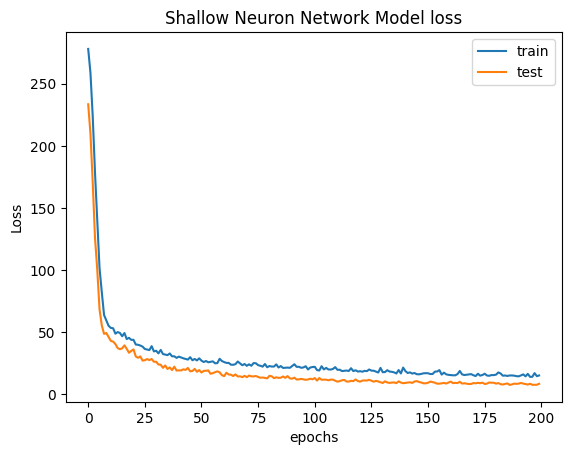

In [98]:
# TODO: plot the training history
plt.plot(train_loss)
plt.plot(test_loss)
plt.title('Shallow Neuron Network Model loss')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'test'], loc='upper right')
plt.show()

## Task 3: Deep Neural Network
Hopefully, you have mastered shallow neural networks after finishing Task 2. Let's move to the deep neural network. In this task, you will be asked to implement the `DNN` class that can be utilized to create deep neural networks with the given model configuration.

### Task 3.1: Implement DNN class
Unlike Task 2, you should try another programming model called Object-oriented programming (OOP). Don't be overwhelmed with the following code. You can efficiently complete this task by reusing most of your code in Task 2.

In [110]:
class DNN:
    def __init__(self, input_size, layer_sizes, epochs=100, lr=0.001, batch_size=64):
        """
        Parameters
        ----------
        input_size: int
            Number of features in the inputs.
        layer_sizes: list
            Number of units in each hidden layer and the output. 
        epochs: int
            Number of epochs to train the model
        lr: float
            Learning rate.
        batch_size: int
            Batch size.
        """
        self.input_size = input_size
        self.layer_sizes = layer_sizes
        self.batch_size = batch_size
        self.epochs = epochs
        self.lr = lr

        # Init model parameters
        self.params = self._init_params()
    
    def _init_params(self):
        """ 
        Initialize model parameters based on He method.

        Return
        ----------
        params: dict
            Initialized model parameters represented by key-value pairs.
        """
        # TODO: write your code here
        params = {}
        layers = [self.input_size] + self.layer_sizes
        for i in range(1, len(layers)):
            params["W" + str(i)] = np.random.randn(layers[i], layers[i-1]) * np.sqrt(2/layers[i-1])
            params["b" + str(i)] = np.zeros(shape=(layers[i], 1))
        return params

    def _relu(self, Z, derivative=False):
        """
        If derivative=False, return the result transformed by the ReLU function.
        If derivative=True, return the result transformed by the derivative of the ReLU function.

        Parameters
        ----------
        Z: ndarray
            Input of the given data.
        derivative: bool.
            Whether or not to take the derivative of the ReLU function.

        Return
        ----------
        A: ndarray
            Output of the transformed matrix.
        """
        # TODO: write your code here
        self.Z = Z
        if not derivative:
            A = np.where(Z > 0, Z, np.zeros_like(Z))
        else:
            A = np.where(Z > 0, np.ones_like(Z), np.zeros_like(Z))
        return A


    def _forward(self, X):
        """
        Generates output predictions for the input samples with given params.
            
        Parameters
        ----------
        X: ndarray
            Input samples with shape of n x m where n is the feature dimension 
            and m is the number of samples.

        Return
        ----------
        output_layers: dict
            Outputs of each layer represented by key-value pairs.
        """
        # TODO: write your code here
        output_layers = {'A0':X}
        for i in range(1, len(self.layer_sizes)+1):
            output_layers[f'Z{i}'] = np.dot(self.params[f'W{i}'], output_layers[f'A{i-1}']) + self.params[f'b{i}']
            output_layers[f'A{i}'] = self._relu(output_layers[f'Z{i}'], derivative=False)
        return output_layers

    
    @staticmethod
    def mse(y_truth, y_pred):
        """
        Return the mean squared error between the ground truth and predictions.
            
        Parameters
        ----------
        y_truth: ndarray
            An 1 x m matrix of ground truth.
        y_pred: ndarray
            An 1 x m matrix of predictions.

        Return
        ----------
        loss: float
            Output of the mean squared error.
        """
        # TODO: write your code here
        return 1 * np.sum((y_pred - y_truth)**2) / (2 * y_truth.shape[1])

    
    def _backward(self, X, y, output_layers):
        """
        Return the gradient of the loss function with respect to the model's weights.
            
        Parameters
        ----------
        X: ndarray
            Input samples with shape of n x m where n is the feature dimension 
            and m is the number of samples.
        y: ndarray
            An 1 x m matrix of ground truth.
        output_layers: dict
            Outputs of each layer represented by key-value pairs.

        Return
        ----------
        gradients: dict
            Gradients of weights and intercepts at each layers.
        """
        # TODO: write your code here
        gradient = {}
        m = X.shape[1]
        for i in range(len(self.layer_sizes), 0, -1):
            if i == len(self.layer_sizes):
                gradient[f'dA{i}'] = output_layers[f'A{i}'] - y
                gradient[f'dZ{i}'] = gradient[f'dA{i}'] * self._relu(output_layers[f'Z{i}'], derivative=True)
                gradient[f'dW{i}'] = gradient[f'dZ{i}'] @ output_layers[f'A{i-1}'].T / m
                gradient[f'db{i}'] = np.sum(gradient[f'dZ{i}'], axis=1, keepdims=True) / m
            else:
                gradient[f'dA{i}'] = self.params[f'W{i+1}'].T @ gradient[f"dZ{i+1}"]
                gradient[f'dZ{i}'] = gradient[f'dA{i}'] * relu(output_layers[f'Z{i}'], derivative=True)
                gradient[f'dW{i}'] = gradient[f'dZ{i}'] @ output_layers[f'A{i-1}'].T / m
                gradient[f'db{i}'] = np.sum(gradient[f'dZ{i}'], axis=1, keepdims=True) / m
        return gradient

    

    def _update(self, gradients):
        """
        Update network parameters according to the update rule of gradient descent. 
            
        Parameters
        ----------
        gradients: dict
            Parameter gradients.
        """
        # TODO: write your code here
        for i in range(1, len(self.layer_sizes)+1):
            self.params[f'W{i}'] -= self.lr * gradients[f'dW{i}']
            self.params[f'b{i}'] -= self.lr * gradients[f'db{i}']

    def train(self, X_train, y_train, X_test, y_test):
        """
        Train the model based on mini-batch graient descent.

        Parameters
        ----------
        X_train: ndarray
            Features of the training data with shape n by m1.
        y_train: ndarray
            Labels of the training data with shape 1 by m1.
        X_test: ndarray
            Features of the training data with shape n by m2.
        y_test: ndarray
            Labels of the training data with shape 1 by m2.

        Return
        ----------
        training_loss_history: list
            Entries are average training losses of all iterations in one epoch.
        test_loss_history: list
            A record of test loss values.
        """
        # TODO: write your code here
        test_loss_history = []
        training_loss_history = []

        for j in range(self.epochs):
            # Training mode
            train_x, train_y = create_batches(X_train, y_train, batch_size)
            losses = []
            for i in range(len(train_x)):
                # Forward propagation
                output = self._forward(train_x[i])
                # Loss
                loss_value = self.mse(train_y[i], output['A4'])
                # Backward propagation
                gradient_value = self._backward(train_x[i], train_y[i], output)
                # Update parameters
                self._update(gradient_value)
                losses.append(loss_value)
            average_loss = np.sum(losses)/len(losses)
            print("Train loss is:", average_loss)
            training_loss_history.append(average_loss)

            # Test mode
            test_x, test_y = create_batches(X_test, y_test, batch_size)
            losses_test = []
            for i in range(len(test_y)):
                # Forward propagation
                test_output = self._forward(test_x[i])
                # Loss
                loss_value = self.mse(test_y[i], test_output["A4"])
                losses_test.append(loss_value)
            average_loss_test = np.sum(losses_test)/len(losses_test)
            print("Test loss is:", average_loss_test)
            test_loss_history.append(average_loss_test)
        return training_loss_history, test_loss_history

    
    def _create_batches(self, X, y):
        """
            Split X and y into small batches with given batch size.

            Parameters
            ----------
            X: ndarray
                Features with shape n by m.
            y: ndarray
                Labels with shape k by m.
            batch_size: int
                Batch size.

            Return
            ----------
            batches_X: list
                Created small batches of X.
            batches_y: list
                Created small batches of y.
        """
        # Get the number of examples
        m = X.shape[1]
        # Get label dimension
        k = y.shape[0]

        # Init variables to save batches
        batches_X = []
        batches_y = []
        
        # Combine X and y
        data = np.vstack((X, y))
        np.random.shuffle(data.T)
            
        # Calcuate the number of mini batches
        n_minibatches = m // batch_size 

        for i in range(n_minibatches): 
            mini_batch = data[:, i * batch_size:(i + 1) * batch_size]        
            batches_X.append(mini_batch[:-k, :])
            batches_y.append(mini_batch[-k:, :])
            
        # Handle the rest data
        if m % batch_size != 0: 
            mini_batch = data[:, n_minibatches * batch_size:]        
            batches_X.append(mini_batch[:-k, :])
            batches_y.append(mini_batch[-k:, :])
            
        return batches_X, batches_y

### Task 3.2: Run your model
Run your model and plot the training losses and test lossses in the **same** figure where x-axis is epoch. 

In [111]:
# Init hyperparameters
epochs = 200
lr = 0.001
batch_size = 64
layer_sizes = [15, 13, 8, 1]

# TODO: create an instance of your DNN class
input_layer_size = X_train.shape[0]
deep_nn = DNN(input_layer_size, layer_sizes, epochs, lr, batch_size)

# TODO: train the model
train_loss_dnn, test_loss_dnn = deep_nn.train(X_train, y_train, X_test, y_test)

Train loss is: 296.6433417197016
Test loss is: 267.8862587859105
Train loss is: 304.19108153595727
Test loss is: 258.5561536576793
Train loss is: 310.0478251362734
Test loss is: 265.74062745305434
Train loss is: 302.62257311637075
Test loss is: 270.4952189002872
Train loss is: 303.9125163587781
Test loss is: 279.76076893472737
Train loss is: 309.27025772614974
Test loss is: 280.63902892438045
Train loss is: 307.6596680931337
Test loss is: 270.94804655486627
Train loss is: 309.2238758005354
Test loss is: 262.25894251565995
Train loss is: 298.19170697304475
Test loss is: 269.99754674730616
Train loss is: 311.84198694073257
Test loss is: 260.083069605751
Train loss is: 304.72146372660785
Test loss is: 249.27432215339235
Train loss is: 272.93096165135364
Test loss is: 215.61067898132848
Train loss is: 221.22295072695357
Test loss is: 128.27265713906766
Train loss is: 111.61583782062438
Test loss is: 72.3078465425828
Train loss is: 76.03504862458445
Test loss is: 61.669562562989
Train loss 

### Task 3.3: Visualize performance

Plot out the training loss curve and the test loss curve in the same figure.

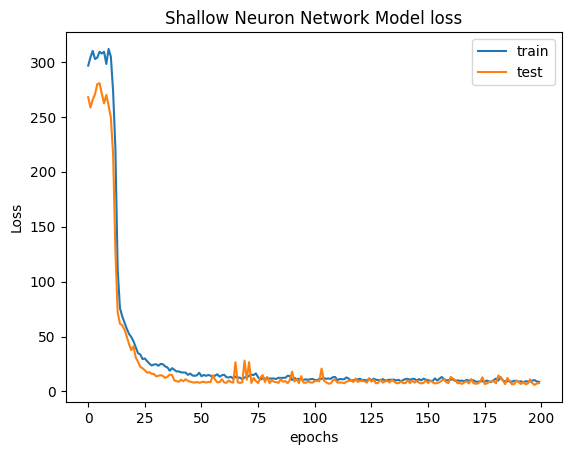

In [112]:
# TODO: plot the training history
plt.plot(train_loss_dnn)
plt.plot(test_loss_dnn)
plt.title('Shallow Neuron Network Model loss')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend(['train', 'test'], loc='upper right')
plt.show()